## The Wonderful World of ML - Session 4 Assignment: Logistic Regression & Regularization

### Problem 1 - Extend Logistic Regression Model From Session 3

In the solutions notebook for session 3, we ran a logistic regression on 2016 Broncos data.  We found that when we added the **Home** variable, the coefficient on this variable was not significantly different from 0, so we left it out of our model.

In this problem, we're going to do a little feature engineering and add a variable called **YrdsDiff** which is computed by taking the difference of offensive yards minus defensive yards.  Try the following:

1) Read in the revised dataset that includes offensive and defensive stats.  Treat all interger variables as continuous and rebuild the logistic regression model using just the Broncos scare and call this  model **logRegBroncos1**.

2) Create a new column in the dataframe called **YrdsDiff** and populate that column with the difference of offensive yards minus defensive yards.  Build a new model using **DenWin** and the new **YrdsDiff** variable and call this model **logRegBroncos3**.

3) Is the coefficient for the new **YrdsDiff** variable significantly different from 0 to justify adding it to our final model?  Why / Why not?

4) What does the difference in the values for AIC for **logRegBroncos** and **logRegBroncos3** suggest?

In [19]:
data_path <- "https://raw.githubusercontent.com/MichaelSzczepaniak/WonderfulML/master/data/broncos2016.csv"
broncos_data <- read.csv(data_path)
head(broncos_data)
logRegBroncos <- glm(broncos_data$DenWin ~ broncos_data$DenScore, family="binomial")
summary(logRegBroncos)

Date,Week,DenScore,OppScore,DenWin,Home,Off1stDwns,OffPassYrds,OffRushYrds,Def1stDwns,DefPassYrds,DefRushYrds,Notes
09/08/2016,1,21,20,1,1,21,159,148,21,176,157,
09/18/2016,2,34,20,1,1,24,266,134,19,170,83,
09/25/2016,3,29,17,1,0,21,303,52,20,189,143,
10/02/2016,4,27,7,1,0,22,218,89,15,143,72,
10/09/2016,5,16,23,0,1,18,183,84,19,250,122,
10/13/2016,6,13,21,0,0,16,220,84,16,166,99,



Call:
glm(formula = broncos_data$DenWin ~ broncos_data$DenScore, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1947  -0.2699   0.2206   0.4761   1.2306  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)  
(Intercept)            -7.0906     3.7653  -1.883   0.0597 .
broncos_data$DenScore   0.3483     0.1702   2.047   0.0407 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21.930  on 15  degrees of freedom
Residual deviance: 10.965  on 14  degrees of freedom
AIC: 14.965

Number of Fisher Scoring iterations: 6


In [20]:
suppressMessages(suppressWarnings(library(dplyr)))
suppressMessages(suppressWarnings(library(stats)))
suppressMessages(suppressWarnings(library(base)))
suppressMessages(suppressWarnings(library(bindrcpp)))

library(dplyr)

broncos_data <- mutate(broncos_data, Delta1stDwns = Off1stDwns - Def1stDwns)
broncos_data <- mutate(broncos_data, YrdsOffTotal = OffPassYrds + OffRushYrds)
broncos_data <- mutate(broncos_data, YrdsDefTotal = DefPassYrds + DefRushYrds)
broncos_data <- mutate(broncos_data, YrdsDiff = YrdsOffTotal - YrdsDefTotal)
#broncos_data[, c('DenWin', 'YrdsDiff')]
#broncos_data
logRegBroncos3 <- glm(broncos_data$DenWin ~ broncos_data$DenScore + broncos_data$YrdsDiff, family="binomial")
summary(logRegBroncos3)


Call:
glm(formula = broncos_data$DenWin ~ broncos_data$DenScore + broncos_data$YrdsDiff, 
    family = "binomial")

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.49668  -0.07598   0.07638   0.35998   1.35019  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)
(Intercept)           -15.94706   10.46565  -1.524    0.128
broncos_data$DenScore   0.74469    0.47232   1.577    0.115
broncos_data$YrdsDiff  -0.01815    0.01417  -1.281    0.200

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21.9301  on 15  degrees of freedom
Residual deviance:  8.6284  on 13  degrees of freedom
AIC: 14.628

Number of Fisher Scoring iterations: 7


Adding **YrdsDiff** is not significantly zero at 95% confidence, but the AIC is a little lower.  AIC is proxy for test error, so it suggests that **logRegBroncos3** might be slightly better than **logRegBroncos**.

### Problem 2 - Add an L2 Weight Penalty

In session 3, we discussed how we could employ shrinkage methods to lower our risk of overfitting.  Specifically, we discussed the effects of applying L1 (lasso) and L2 (ridge) penalties to regression models.  What we did not discuss, was that you can apply them to classification.  The basic motivation behind applying these methods for classification are similar to those behind applying them for regression: We want to minimize overfitting.

These 2 videos (in the repo) from the University of Washington's [**Machine Learning: Classification** class on coursera](https://www.coursera.org/learn/ml-classification/home/welcome) (requires an account on coursera) do a really nice job of describing why and how to apply an L2 weight penalty to a logistic regression model:

+ [Penalizing large coefficients to mitigate overfitting](https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/docs/resources/010%20-%20Penalizing%20large%20coefficients%20to%20mitigate%20overfitting.mp4)
+ [L2 Regularized Logistic Regression](https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/docs/resources/011%20-%20L2%20regularized%20logistic%20regression.mp4)

Let's see how an L2 weight penalty can help us.  Try this task:

1) Read in this cleaned and truncated version of the [Titanic data set](https://raw.githubusercontent.com/MichaelSzczepaniak/WonderfulML/master/data/titanic_class_sex_age.csv).  A description of the data can be found in the [Data Dictionary section of this document](https://github.com/MichaelSzczepaniak/Jamatitanic/blob/master/data/titanic%20data%20dictionary.pdf).  After the read, split the data into 3 partitions: 400 training sample, 200 test sample, and 114 validation samples.  Use the code provided below to get started.

2) Using just the training set, fit a logistic regression model starting with **Pclass** then adding **Age** and **Sex** if they are significantly non-zero and improve AIC.  What does an improvement in AIC look like (increase or decrease)? Why?

3) Use the training and validation set to determine which of these 10 values of L2 weight penalty $\lambda$ minimizes the negative log-likelihood cost function (same as maximizing the log-likelihood).  Use the following algorithm:


In [21]:
data_all <- read.csv("https://raw.githubusercontent.com/MichaelSzczepaniak/WonderfulML/master/data/titanic_class_sex_age.csv", na.strings = c("NA", ""), stringsAsFactors = FALSE)
data_all <- data_all[, c('PassengerId','Survived', 'Pclass', 'Name', 'Sex', 'Age')]
head(data_all)

PassengerId,Survived,Pclass,Name,Sex,Age
1,0,3,"Braund, Mr. Owen Harris",male,22
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38
3,1,3,"Heikkinen, Miss. Laina",female,26
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35
5,0,3,"Allen, Mr. William Henry",male,35
7,0,1,"McCarthy, Mr. Timothy J",male,54


In [22]:
suppressMessages(suppressWarnings(library(caret)))
suppressMessages(suppressWarnings(library(lattice)))
suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(e1071)))

library(caret)
library(e1071)
set.seed(711)

# Factorize the discrete variables
data_all$Survived <- factor(data_all$Survived)
data_all$Sex <- factor(data_all$Sex)
data_all$Pclass <- factor(data_all$Pclass)

# Create training, validation, and test datasets
train_test_indices <- sample(1:nrow(data_all), 600)
valid_data <- data_all[-train_test_indices, ]     # 714 - 600 = 114 validation samples
train_indices <- sample(train_test_indices, 400)  # 400 train samples
test_indices <- setdiff(train_test_indices, train_indices)
train_data <- data_all[train_indices, ]
test_data <- data_all[test_indices, ]             # 200 test samples
# Check: If train, test, and validation are disjoint, id_keys should have nrow(data_all) = 714 rows
id_keys <- union(union(train_data$PassengerId, test_data$PassengerId), valid_data$PassengerId)
c(nrow(train_data), nrow(test_data), nrow(valid_data), length(id_keys))

[1] 400 200 114 714

In [23]:
titanic_mod1 <- glm(Survived ~ Pclass, data=train_data, family="binomial")
summary(titanic_mod1)


Call:
glm(formula = Survived ~ Pclass, family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4028  -0.7059  -0.7059   0.9860   1.7389  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.5158     0.1998   2.581  0.00984 ** 
Pclass2      -0.1863     0.2861  -0.651  0.51488    
Pclass3      -1.7785     0.2641  -6.734 1.65e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 543.58  on 399  degrees of freedom
Residual deviance: 480.43  on 397  degrees of freedom
AIC: 486.43

Number of Fisher Scoring iterations: 4


Significance of the intercept and **Pclass** slope look good.  Let's add **Age** and see what happens.

In [24]:
titanic_mod2 <- glm(Survived ~ Pclass + Age, data=train_data, family="binomial")
summary(titanic_mod2)


Call:
glm(formula = Survived ~ Pclass + Age, family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1395  -0.8144  -0.5592   0.9203   2.4766  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.270464   0.419155   5.417 6.07e-08 ***
Pclass2     -0.520854   0.308600  -1.688   0.0915 .  
Pclass3     -2.493670   0.321131  -7.765 8.15e-15 ***
Age         -0.044378   0.008941  -4.963 6.92e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 543.58  on 399  degrees of freedom
Residual deviance: 452.79  on 396  degrees of freedom
AIC: 460.79

Number of Fisher Scoring iterations: 3


All parameters appear significant and we got a small reduction in AIC, so it looks like we are going in the right direction.  Let's add our last parameter **Sex** and see what happens.

In [25]:
titanic_mod3 <- glm(Survived ~ Pclass + Age + Sex, data=train_data, family="binomial")
summary(titanic_mod3)


Call:
glm(formula = Survived ~ Pclass + Age + Sex, family = "binomial", 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7544  -0.6141  -0.3442   0.5282   2.5527  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.84730    0.54922   7.005 2.47e-12 ***
Pclass2     -0.74882    0.37871  -1.977 0.048009 *  
Pclass3     -2.54751    0.38901  -6.549 5.80e-11 ***
Age         -0.03838    0.01034  -3.712 0.000206 ***
Sexmale     -2.83001    0.29192  -9.695  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 543.58  on 399  degrees of freedom
Residual deviance: 333.29  on 395  degrees of freedom
AIC: 343.29

Number of Fisher Scoring iterations: 5


All parameters are still significant and we got an even bigger reduction in AIC, so let's see how this model does on the validation set.

In [26]:
# retrain using caret interface for easier evaluation
titanic_mod3 <- train(Survived ~ Pclass + Age + Sex, method='glm', data=train_data, family="binomial")
mod3_valid_results <- predict(titanic_mod3, newdata=valid_data)
mod3_valid_acc <- sum(mod3_valid_results == valid_data$Survived) / nrow(valid_data)
mod3_valid_acc

[1] 0.8157895

Not too bad, now lets manually implement a search for an L2 weight penalty.

$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\wv_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

## The Wonderful World of ML - Session 4 Discussion: 
## Linear & Quadratic Discriminant Analysis (LDA & QDA)

In logistic regression, we were fitting a function directly to our probablity of a certain class given the data or $P(C_n=k\,|\, \xv_n)$ where $C_n=\text{class of } n^\text{th}\text{ sample}$.  In LDA and QDA, we do something a little different.  We start by modeling the likelihood of the data within each class or $P(\xv_n\,|\, C=k)$ and then use Bayes' Theorem (shown below) to compute the probability of a certain class given that data or $P(C_n=k\,|\, \xv_n)$.

(1)$$
	P(C=k|x) = \frac{P(x|C=k) P(C=k)}{P(x)}
$$

This seems a little cumbersome doesn't it?  Can you think of any reasons why we would want to do this?

Well, if we think about this a little, we might realize that we typically can observe how the data is distributed within a class (sometimes referred to as "the likelihood of the data") which is the $p(\xv_n\,|\, C=k)$ term.  We might then conclude that it is natural to use these distributions within each class to infer the actual class from the data.

In order to make use of (1), we need to make a important assumption about the probability distribution of a data sample from each class to define $P(\xv_n\,|\, C=k)$.  A common assumption is that this distribution is Normal with mean $\mu_k$ and covariance matrix $\Sigma_k$.  This assumption allows $P(\xv_n\,|\, C=k)$ to be expressed using the common relationship for the d-dimensional Guassian distribution as shown in equation (2).

(2)$$
P(x|C=k) = \frac{1}{(2\pi)^{\frac{p}{2}} |\Sigma_k|^{\frac{1}{2}}}
e^{-\frac{1}{2}(x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k)}
$$




To classify $x$ as being from Class 1 in a two-class discrimination problem, we must check to see if  $P(C=1 | x) > P(C=2 | x)$ is true.  Rewriting each side of the inequality using Bayes' Theorem we get equation (3).

(3)$$
P(x|C=1) P(C=1) / P(x) > P(x|C=2)P(C=2)/P(x)
$$

Since $P(x)$ is positive, it can be removed from each side.  And since we have defined $P(x|C=k)$ to be a Normal distribution involving an exponential, we can take the logarithm and expand both sides as shown in equations (4) and (5).

(4)$$
\log( P(x|C=1) P(C=1)) > \log( P(x|C=2) P(C=2))
$$

(5)$$
\log( P(x|C=1)) + \log( P(C=1)) > \log( P(x|C=2)) + \log( P(C=2))
$$

If we substitute equation (2) into (5) and simplify, the left side of the inequality would look like what is shown in (6) and the right side would look like what is shown in (7).

(6)$$
-\frac{1}{2} \log |\Sigma_1| -\frac{1}{2}(x-\mu_1)^T \Sigma_1^{-1} (x-\mu_1) + \log P(C=1)
$$

(7)$$
-\frac{1}{2} \log |\Sigma_2| -\frac{1}{2}(x-\mu_2)^T \Sigma_2^{-1} (x-\mu_2) + \log P(C=2)
$$

If we define each side of this inequality as a discriminant function, $\delta(x)$ for
Class 1 or 2, then, in general

(8)$$
\delta_k(x) = -\frac{1}{2} \log |\Sigma_k| -\frac{1}{2}(x-\mu_k)^T
\Sigma_k^{-1} (x-\mu_k) + \log P(C=k)
$$

and the class of a new sample $x$ is $argmax_k \delta_k(x)$.  Notice
that the boundary between Class 1 and Class 2 is the set of points $x$
for which $\delta_1(x) = \delta_2(x)$.  Substituting in the definitions of these discriminant functions we see that this equation is quadratic in $x$, meaning that the boundary between Class 1 and 2 is quadratic.  We have just defined **Quadratic Discriminant Analysis**, or **QDA**.  

In order to apply QDA to a given sets of data samples $X_1, X_2, \ldots, X_K$ from Classes $1, 2, \dots, K$, we must compute the likelihood and prior terms: $P(x|C=k)$ and $P(C=k)$ respectively, using (9), (10), and (11):

(9)$$
\mu_k = \frac{1}{N_k} \sum_{x \in X_k} x
$$

(10)$$
\Sigma_k = \frac{1}{N_k-1} \sum_{x\in X_k} (x-\mu_k) (x-\mu_k)^T
$$

(11)$$
P(C=k) = \frac{N_k}{N}
$$

where $N_k$ is the number of samples in $X_k$ and $N$ is the number of all samples.

### Linear Discriminant Analysis (LDA)

LDA is derived in the same way as QDA with the additional assumption that the variance within each class are equal.  Making this additional assumption allows us to simplify the terms in (6) and (7) defined on both sides inequality as shown in equation (12).

(12)$$
x^T \Sigma^{-1} \mu_1 - \frac{1}{2}\mu_1^T \Sigma^{-1} \mu_1 + \log P(C=1) >
x^T \Sigma^{-1} \mu_2 - \frac{1}{2}\mu_2^T \Sigma^{-1} \mu_2 + \log P(C=2)
$$

which results in the new discriminant defined in equation (13) which is the same as equation (4.19) in the ESL.

(13)$$
\delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log P(C=k)
$$

where the new effectively averaged covariance matrix is defined by (14).

(14)$$
\Sigma = \frac{1}{N-K} \sum_{k=1}^K \sum_{x\in X_k}(x-\mu_k)(x-\mu_k)^T
$$

Like QDA, the maximum $\delta_k(x)$ for a given $x$ determines the class.

Let's implement QDA and LDA on some 1 and 2-D sythetic data for illustration purposes.  After that, we'll take them for a spin on [an interesting real data set](http://archive.ics.uci.edu/ml/datasets/heart+Disease).  Let's start with QDA on 1-D data.

### 1-D QDA & LDA Visualizations On Synthetic Data

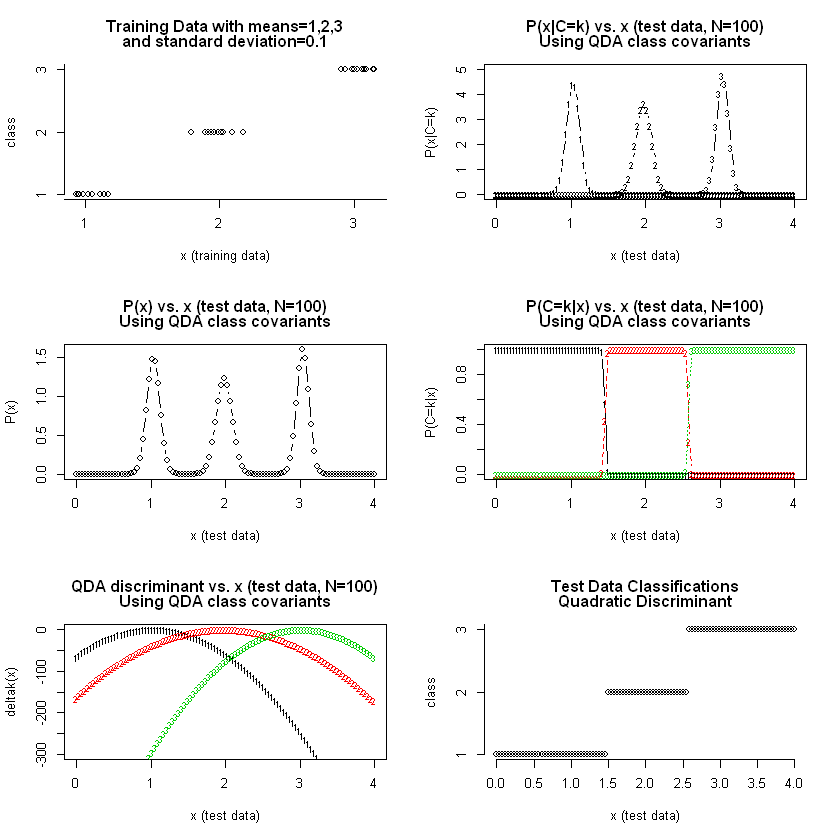

In [27]:
# The following functions live in QdaLda.R:
# priorPofC, classMeans, classCovars, mydnormm, deltQda, deltLda (used in the next section)
source('../../R/QdaLda.R')  # assumes notebook running in ../WonderfulML/docs/solutions

# Creates and returns a 1-D data table. nc = number of classes,
# ms = the mean of the 1-D dataset, stds = std. deviation of the 1-D
# data set.
getData1D <- function(nc, ms, stds, seed=711) {
    set.seed(seed)
    data <- NULL

    # create the data to classify
    for (class in 1:nc) {
        data <- rbind(data, cbind(rep(class, 10), rnorm(10,ms[class],stds)))
    }
    colnames(data) <- c("class","sample")

    return(data)
}

plot1D_Training <- function(dat) {
    plt <- plot(dat[,2],dat[,1],xlab="x (training data)",ylab="class",
     main=c("Training Data with means=1,2,3",
            "and standard deviation=0.1"), axes=FALSE)
    axis(1, seq(0,4,by=1.0))
    axis(2, 1:4)
    
    return(plt)
}

# Creates a 3x2 panel of plots for the result of QDA on 1D synthetic data
plotQda_1d <- function(class_means=c(1, 2, 3), class_stdevs=c(0.1, 0.1, 0.1)) {
    # generate 3x2 plots for QDA evaluation
    par(mfrow=c(3,2))  # adjust as plots are added
    # generate and plot 1-D training data
    xtrain <- getData1D(3, class_means, class_stdevs)
    plot1D_Training(xtrain)

    # generate sample 1-D test data
    xtest <- matrix(seq(0,4,len=100),100,1)
    Ntest <- length(xtest)
    
    # compute priors, class means, and class covariance matrices
    pc <- priorPofX(xtrain)
    muk <- classMeans(xtrain)
    var <- classCovars(xtrain, muk) 

    # generate some sample 1-D test data
    xtest <- matrix(seq(0,4,len=100),100,1)
    Ntest <- length(xtest)

    # calc & plot P(x|C=k) vs. x, start by eval'ing the first class
    pxc <- xtest
    pxc <- cbind(pxc, mydnormm(xtest, muk[1,], var[[1]]))
    colnames(pxc)[] <- c("x","pxc 1")
    plot(pxc[,1], pxc[,2], type="b", xlim=c(0,4), ylim=c(0,5),
         pch=paste(1), cex=0.7, main=c("P(x|C=k) vs. x (test data, N=100)",
         "Using QDA class covariants"),
         xlab="x (test data)", ylab="P(x|C=k)")
    
    # now evaluate the remaining classes
    for(class in 2:nclass){
      #pxc <- cbind(pxc, data[which(data[,1]==class),2])
      pcalcs <- mydnormm(xtest,muk[class,],var[[class]])
      pxc <- cbind(pxc, pcalcs)
      colnames(pxc)[ncol(pxc)] <- paste("pxc",class)
      points(pxc[,1],pxc[,class+1], type="b",
             pch=paste(class), cex=0.7)
    }
    
    # calc & plot P(x) vs. x
    ptable <- cbind(pxc, rep(0,Ntest))  # init P(x) in last col
    pxcol <- ncol(ptable)               # set up P(x) column of values
    colnames(ptable)[pxcol] <- "pofx"
    for(class in 1:nclass)
      ptable[,pxcol] <- ptable[,pxcol]+(pxc[,class+1]*pc[class])

    plot(ptable[,1],ptable[,pxcol], type="b",
        main=c("P(x) vs. x (test data, N=100)",
               "Using QDA class covariants"),
               xlab="x (test data)", ylab="P(x)")

    # calc & plot P(C|x) vs. x
    for(class in 1:nclass) {
      pcx <- ptable[,class+1] * pc[class] / ptable[,nclass+2]
      ptable <- cbind(ptable, pcx)
      colnames(ptable)[ncol(ptable)] <- paste("pcx",class)
    }
    pcx1col <- nclass + 3
    pcxkcol <- pcx1col + (nclass - 1)
    matplot(ptable[,1],ptable[,pcx1col:pcxkcol], type="b", cex=0.7,
           main=c("P(C=k|x) vs. x (test data, N=100)",
           "Using QDA class covariants"),
           xlab="x (test data)", ylab="P(C=k|x)")
        
    # calc & plot little delta(x) QDA disciminant vs. x
    dx <- deltQda(xtest, Ntest, nclass, pc, muk, var)
    dx <- cbind(xtest,dx)
    matplot(dx[,1], dx[,2:ncol(dx)], ylim=c(-300,0), cex=0.7,
            main=c("QDA discriminant vs. x (test data, N=100)",
            "Using QDA class covariants"),
            xlab="x (test data)", ylab="deltak(x)")

    # do the QDA classification and plot the results
    classif <- dx
    classif <- cbind(classif, rep(0,nrow(classif)))
    colnames(classif) <- c("x", paste("dx", 1:nclass), "class")
    for(rw in 1:nrow(classif))
      classif[rw,ncol(classif)] <- which.max(classif[rw,2:(ncol(classif)-1)])

    plot(classif[,1],classif[,ncol(classif)],
        xlab="x (test data)",ylab="class",
        main=c("Test Data Classifications",
        "Quadratic Discriminant"), axes=FALSE)
    axis(1, seq(0,4,by=0.5))
    axis(2, 1:4)
}

plotQda_1d()

Let's see how this same analysis looks using LDA on the 1-D data.

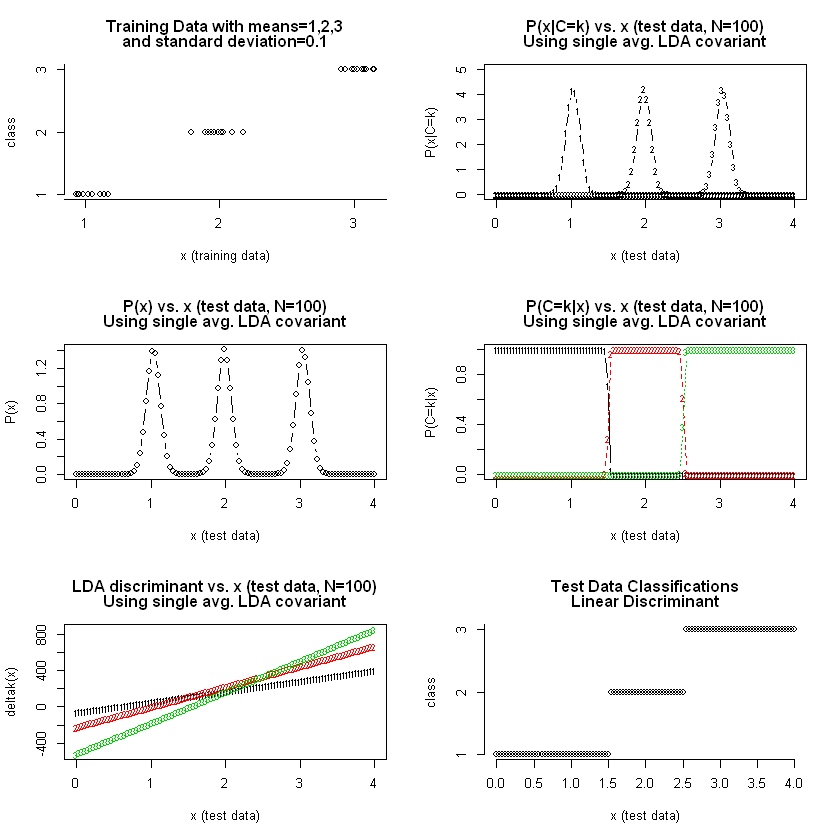

In [31]:
# plot the 1-D LDA results
plotLda_1d <- function(class_means=c(1, 2, 3), class_stdevs=c(0.1, 0.1, 0.1)) {
    # generate 3x2 plots for LDA evaluation
    par(mfrow=c(3,2))  # adjust as plots are added
    # generate and plot 1-D training data
    xtrain <- getData1D(3, class_means, class_stdevs)
    plot1D_Training(xtrain)

    # generate sample 1-D test data
    xtest <- matrix(seq(0,4,len=100),100,1)
    Ntest <- length(xtest)

    # calculate priors and class means
    pc <- priorPofX(xtrain)
    muk <- classMeans(xtrain)
    # compute the average covariance matrix if data is 2 or more dimensions
    # single average variance value if data is 1 dimensional
    var <- AvgLdaCovar(xtrain)

    # generate some sample 1-D test data
    xtest <- matrix(seq(0,4,len=100),100,1)
    Ntest <- length(xtest)

    # calc & plot P(x|C=k) vs. x, start by eval'ing the first class
    pxc <- xtest
    pxc <- cbind(pxc, mydnormm(xtest, muk[1,], var))
    colnames(pxc)[] <- c("x","pxc 1")
    plot(pxc[,1],pxc[,2],type="b", xlim=c(0,4), ylim=c(0,5),
         pch=paste(1), cex=0.7,
         main=c("P(x|C=k) vs. x (test data, N=100)",
         "Using single avg. LDA covariant"),
         xlab="x (test data)", ylab="P(x|C=k)")

    # now evaluate the remaining classes
    for(class in 2:nclass){
        #pxc <- cbind(pxc, data[which(data[,1]==class),2])
        pcalcs <- mydnormm(xtest,muk[class,], var)
        pxc <- cbind(pxc, pcalcs)
        colnames(pxc)[ncol(pxc)] <- paste("pxc",class)
        points(pxc[,1], pxc[,class+1], type="b",
             pch=paste(class), cex=0.7)
    }

    # calc & plot P(x) vs. x
    ptable <- cbind(pxc, rep(0,Ntest))  # init P(x) in last col
    pxcol <- ncol(ptable)               # set up P(x) column of values
    colnames(ptable)[pxcol] <- "pofx"
    for(class in 1:nclass)
        ptable[,pxcol] <- ptable[,pxcol]+(pxc[,class+1]*pc[class])

    plot(ptable[,1],ptable[,pxcol], type="b",
         main=c("P(x) vs. x (test data, N=100)",
         "Using single avg. LDA covariant"),
         xlab="x (test data)", ylab="P(x)")


    # calc & plot P(C|x) vs. x
    for(class in 1:nclass) {
        pcx <- ptable[,class+1] * pc[class] / ptable[,nclass+2]
        ptable <- cbind(ptable, pcx)
        colnames(ptable)[ncol(ptable)] <- paste("pcx", class)
    }
    pcx1col <- nclass + 3
    pcxkcol <- pcx1col + (nclass - 1)
    matplot(ptable[,1],ptable[,pcx1col:pcxkcol], type="b", cex=0.7,
            main=c("P(C=k|x) vs. x (test data, N=100)",
            "Using single avg. LDA covariant"),
            xlab="x (test data)", ylab="P(C=k|x)")


    # calc & plot little delta(x) LDA disciminant vs. x
    dx <- deltLda(xtest, Ntest, nclass, pc, muk, var)
    dx <- cbind(xtest,dx)
    matplot(dx[,1],dx[,2:ncol(dx)],cex=0.7,
            main=c("LDA discriminant vs. x (test data, N=100)",
            "Using single avg. LDA covariant"),
            xlab="x (test data)", ylab="deltak(x)")


    # do the LDA classification and plot the results
    classif <- dx
    classif <- cbind(classif, rep(0,nrow(classif)))
    colnames(classif) <- c("x", paste("dx",1:nclass), "class")
    for(rw in 1:nrow(classif))
        classif[rw,ncol(classif)] <- which.max(classif[rw,2:(ncol(classif)-1)])

    plot(classif[,1],classif[,ncol(classif)],
         xlab="x (test data)",ylab="class",
         main=c("Test Data Classifications",
         "Linear Discriminant"), axes=FALSE)

    axis(1, seq(0,4,by=0.5))
    axis(2, 1:4)
}

plotLda_1d()

### 2-D QDA & LDA Visualizations On Synthetic Data

In this section we'll generate 2 datasets for each analysis: one nice and one naughty.

#### 2-D QDA On Nice Data

The first dataset will be *nice* meaning that it is seperable in 2-D space.  Notice the upper left plot.

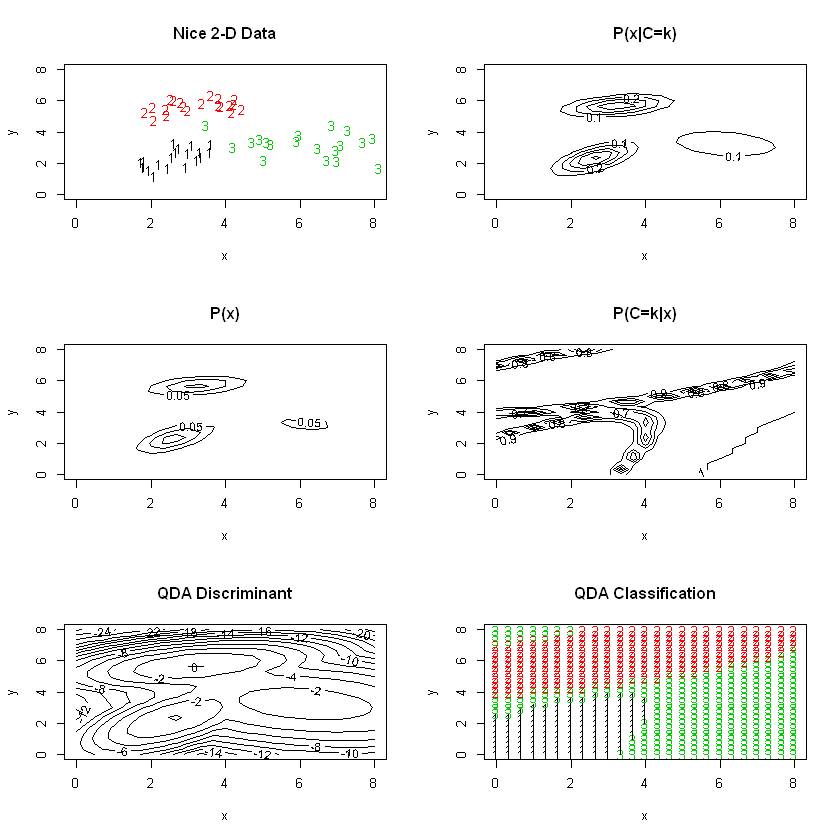

In [9]:
source('../../R/Qda2dPlotting.R')  # assumes notebook running in ../WonderfulML/docs/solutions
plotQda_2d()

#### 2-D QDA On Naughty Data

Let's take a look at a data that is not seperable in 2-D.

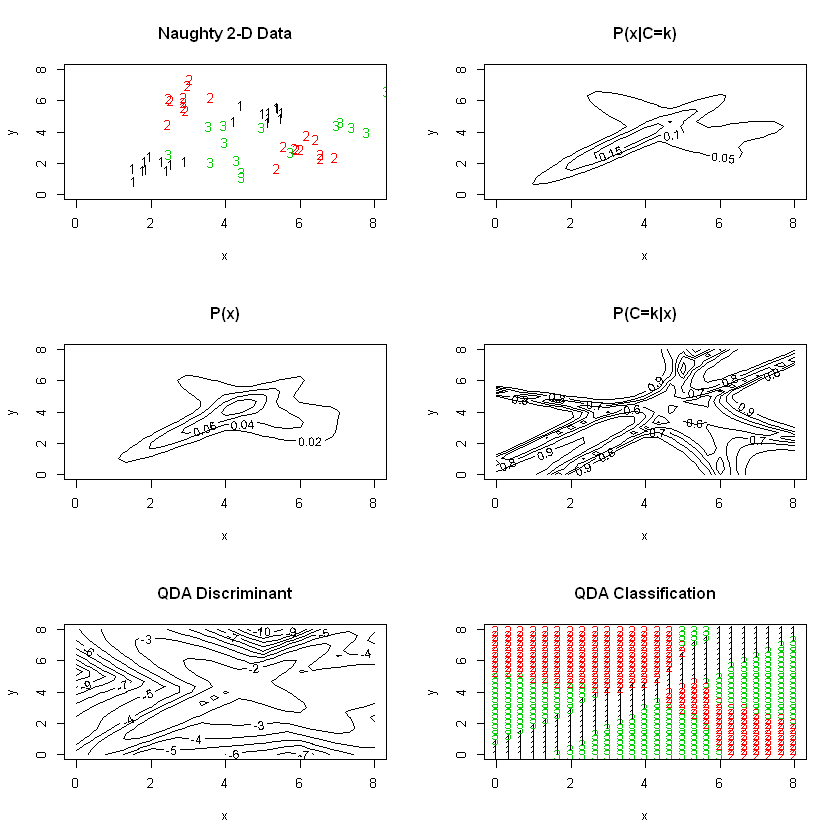

In [8]:
plotQda_2d(1)  # any number not 0 will be naughty data

#### 2-D LDA On Nice Data